In [1]:
from NIDS import *

In [2]:
nids = NIDS_Manager("UNSW-NB15-BALANCED-TRAIN.csv", "LRCV", "attack_cat")

## Feature Analysis

### Label

In [ ]:
nids.rfecv_fit(nids.x, nids.y_label)
label_selected_features = nids.rfecv_selected_features()
print(label_selected_features)
print(nids.rfecv_score(nids.x, nids.y_label))
nids.rfecv_plot()

### attack_cat

Index(['dsport', 'sbytes', 'dbytes', 'sttl', 'service', 'smeansz', 'dmeansz'], dtype='object')
0.35224420189479255


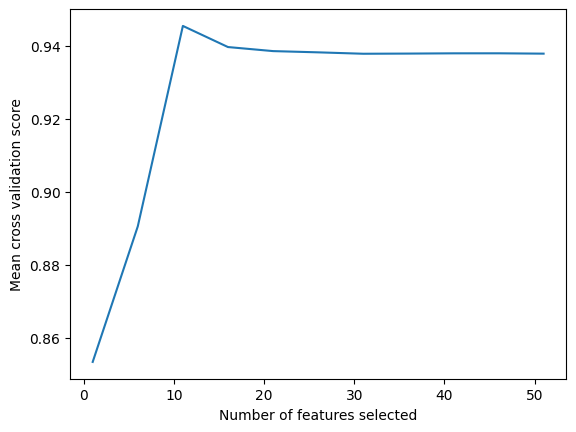

In [3]:
nids.rfecv_fit(nids.x, nids.y_attack_cat)
attack_selected_features = nids.rfecv_selected_features()
print(attack_selected_features)
print(nids.rfecv_score(nids.x, nids.y_attack_cat))
nids.rfecv_plot()

## Classification (Logistic Regression)

### Label

#### With feature selection

In [ ]:
log_lab_pred_fs, log_lab_score_fs = nids.run_logistic(nids.rfecv_x_specific_select(nids.x_train, label_selected_features), nids.rfecv_x_specific_select(nids.x_test, label_selected_features), nids.y_train_label, nids.y_test_label)
log_lab_pred_fs, log_lab_score_fs

In [ ]:
nids.print_class_report(nids.y_test_label, log_lab_pred_fs)

#### Without feature selection

In [ ]:
log_lab_pred, log_lab_score = nids.run_logistic(nids.x_train, nids.x_test, nids.y_train_label, nids.y_test_label)
log_lab_pred, log_lab_score

In [ ]:
nids.print_class_report(nids.y_test_label, log_lab_pred)

In [ ]:
#pickle.dump(nids.classifier.log_reg, open("LRCV_Label.sav", 'wb'))

### attack_cat

#### With feature selection

In [4]:
log_atk_pred_fs, log_atk_score_fs = nids.run_logistic(nids.rfecv_x_specific_select(nids.x_train, attack_selected_features), nids.rfecv_x_specific_select(nids.x_test, attack_selected_features), nids.y_train_attack, nids.y_test_attack)
log_atk_pred_fs, log_atk_score_fs

(array(['Generic', 'Generic', 'Generic', ..., 'Backdoor', 'Generic', ''],
       dtype=object),
 0.5341570409723233)

In [5]:
nids.print_class_report(nids.y_test_attack, log_atk_pred_fs)

Classifier: Principal Component Analysis (PCA) 

                precision    recall  f1-score   support

                     0.99      0.94      0.96     67336
      Analysis       0.12      0.20      0.15       568
      Backdoor       0.02      0.04      0.03       361
     Backdoors       0.01      0.84      0.02       122
           DoS       0.52      0.01      0.02      3396
      Exploits       0.43      0.27      0.33      9227
       Fuzzers       0.58      0.44      0.50      5053
       Generic       0.99      0.97      0.98     45542
Reconnaissance       0.31      0.48      0.38      2960
     Shellcode       0.53      0.82      0.64       328
         Worms       0.02      0.86      0.04        35

      accuracy                           0.85    134928
     macro avg       0.41      0.53      0.37    134928
  weighted avg       0.90      0.85      0.86    134928



#### Without feature selection

In [ ]:
log_atk_pred, log_atk_score = nids.run_logistic(nids.x_train, nids.x_test, nids.y_train_attack, nids.y_test_attack)
log_atk_pred, log_atk_score

In [ ]:
nids.print_class_report(nids.y_test_attack, log_atk_pred)

In [ ]:
#pickle.dump(nids.classifier.log_reg, open("LRCV_Attack.sav", 'wb'))

## Support Vector Classification (SVC)

In [7]:
nids.classifier_init('SVC')

0

### Label

In [ ]:
svc_label_pred, svc_label_score = nids.run_svc(nids.rfecv_x_specific_select(nids.x_train, label_selected_features), nids.rfecv_x_specific_select(nids.x_test, label_selected_features), nids.y_train_label, nids.y_test_label)
svc_label_pred, svc_label_score

In [ ]:
nids.print_class_report(nids.y_test_label, svc_label_pred)

In [ ]:
#pickle.dump(nids.classifier.svc, open("SVC_Label.sav", 'wb'))

### attack_cat

In [8]:
svc_atk_pred, svc_atk_score = nids.run_svc(nids.rfecv_x_specific_select(nids.x_train, attack_selected_features), nids.rfecv_x_specific_select(nids.x_test, attack_selected_features), nids.y_train_attack, nids.y_test_attack)
svc_atk_pred, svc_atk_score

(array(['Generic', 'Generic', 'Generic', ..., 'Exploits', 'Generic', ''],
       dtype=object),
 0.8754520929681016)

In [9]:
nids.print_class_report(nids.y_test_attack, svc_atk_pred)

Classifier: Principal Component Analysis (PCA) 

                precision    recall  f1-score   support

                     0.94      0.98      0.96     67336
      Analysis       0.00      0.00      0.00       568
      Backdoor       0.00      0.00      0.00       361
     Backdoors       0.00      0.00      0.00       122
           DoS       0.00      0.00      0.00      3396
      Exploits       0.35      0.47      0.40      9227
       Fuzzers       0.49      0.33      0.40      5053
       Generic       0.99      0.97      0.98     45542
Reconnaissance       0.38      0.40      0.39      2960
     Shellcode       0.53      0.77      0.63       328
         Worms       0.00      0.00      0.00        35

      accuracy                           0.88    134928
     macro avg       0.33      0.36      0.34    134928
  weighted avg       0.85      0.88      0.86    134928



In [ ]:
#pickle.dump(nids.classifier.svc, open("SVC_Attack.sav", 'wb'))